In [46]:
# Julia ML notebook one:
# https://github.com/JuliaAcademy/DataScience

## 1. Data

In [47]:
using BenchmarkTools
using DataFrames
using DelimitedFiles
using CSV
using XLSX
using Queryverse,VegaDatasets,IndexedTables

In [48]:
# get some data
P = download("https://raw.githubusercontent.com/nassarhuda/easy_data/master/programming_languages.csv",
    "programminglanguages.csv")

"programminglanguages.csv"

In [49]:
P,H = readdlm("programminglanguages.csv",',';header=true);

In [50]:
H

1×2 Array{AbstractString,2}:
 "year"  "language"

In [51]:
C = CSV.read("programminglanguages.csv");

In [52]:
C[1:5,:]

,year,language
,Int64,String
1,1951,Regional Assembly Language
2,1952,Autocode
3,1954,IPL
4,1955,FLOW-MATIC
5,1957,FORTRAN


In [53]:
names(C)

2-element Array{String,1}:
 "year"
 "language"

In [54]:
describe(C)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,year,1982.99,1951,1986.0,2014,,,Int64
2,language,,ALGOL 58,,dBase III,73,,String


## 4. Dimensionality Reduction

In [58]:
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]
└ @ Base loading.jl:1278
┌ Info: Precompiling MLBase [f0e99cf1-93fa-52ec-9ecc-5026115318e0]
└ @ Base loading.jl:1278


In [60]:
C = DataFrame(VegaDatasets.dataset("cars"));

In [63]:
dropmissing!(C)
M = Matrix(C[:2:7])
names(C)

9-element Array{String,1}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [61]:
describe(C)

,variable,mean,min,median,max,nunique
,Symbol,Union…,Any,Union…,Any,Union…
1,Name,,amc ambassador brougham,,vw rabbit custom,311
2,Miles_per_Gallon,23.5146,9.0,23.0,46.6,
3,Cylinders,5.47537,3,4.0,8,
4,Displacement,194.78,68.0,151.0,455.0,
5,Horsepower,105.082,46,95.0,230,
6,Weight_in_lbs,2979.41,1613,2822.5,5140,
7,Acceleration,15.5197,8.0,15.5,24.8,
8,Year,,1970-01-01,,1982-01-01,12
9,Origin,,Europe,,USA,3


In [67]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin)
uniqueids = labelencode(carmap,car_origin);

### 4.1.1 PCA

In [69]:
# PCA
# Center and normalize data
data = M
data = (data.-mean(data,dims=1))./std(data,dims=1);

In [73]:
# fit the model via PCA
p = fit(PCA,data',maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.919482878533357)

In [75]:
# obtain the projection matrix
P = projection(p);

In [77]:
# transform all data via transform function
Yte = MultivariateStats.transform(p,data')

2×392 Array{Float64,2}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

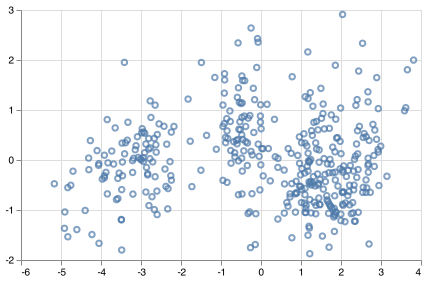

In [114]:
using Queryverse,VegaDatasets,IndexedTables
@vlplot(:point,x=Yte[1,:],y=Yte[2,:],height=250,width=400)

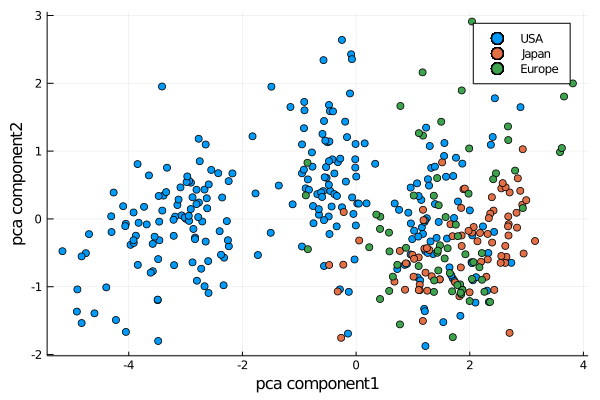

In [92]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")